In [1]:
# To reload when the files change
from support_mvp.backup_plot_diagram.plot_diagram_schrock import *
import sys
import importlib
importlib.reload(sys.modules['support_mvp.backup_plot_diagram'])

<module 'support_mvp.backup_plot_diagram' from '/home/magstr/opt/support_mvp/support_mvp/backup_plot_diagram/__init__.py'>

In [2]:
# Adjust troublesome values
# compare_data['b3lyp_candidate']['Mo_N'] = 0

cmap = cm.get_cmap("Set1")
# colors = cmap.colors
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
colors = ["k", "#1f77b4", "0.80"]  # Could also use the color generator above

# Get the reference energy dicts.
dicts = read_parts()

### Functions

In [3]:
def draw_mol(
    mol,
    width=900,
    height=900,
    Hs=False,
    confId=-1,
    multipleConfs=False,
    atomlabel=False,
    hit_ats=None,
    gen_struct=None,
    trajectory=False,
):
    n_cores = options.pop("n_cores")
    p = py3Dmol.view(width=width, height=height)
    
    if isinstance(mol, str):
        xyz_f = open(mol)
        line = xyz_f.read()
        xyz_f.close()
        p.addModel(line, "xyz")
    else:
        if multipleConfs:
            for conf in mol.GetConformers():
                mb = Chem.MolToMolBlock(mol, confId=conf.GetId())
                p.addModel(mb, "sdf")
        else:
            mb = Chem.MolToMolBlock(mol)
            p.addModel(mb, "sdf")
        
    p.setStyle({"stick": {"radius": 0.2}, "sphere":
                {"radius": 0.3}})
    if atomlabel:
        p.addPropertyLabels("index")  # ,{'elem':'H'}
    p.zoomTo()
    p.update()

### Plot b3lyp comparison with reference

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.407765406183898
NH3->N2_NH3 : -2.109329391270876
NH3+->NH3 : 1.5165617705788463


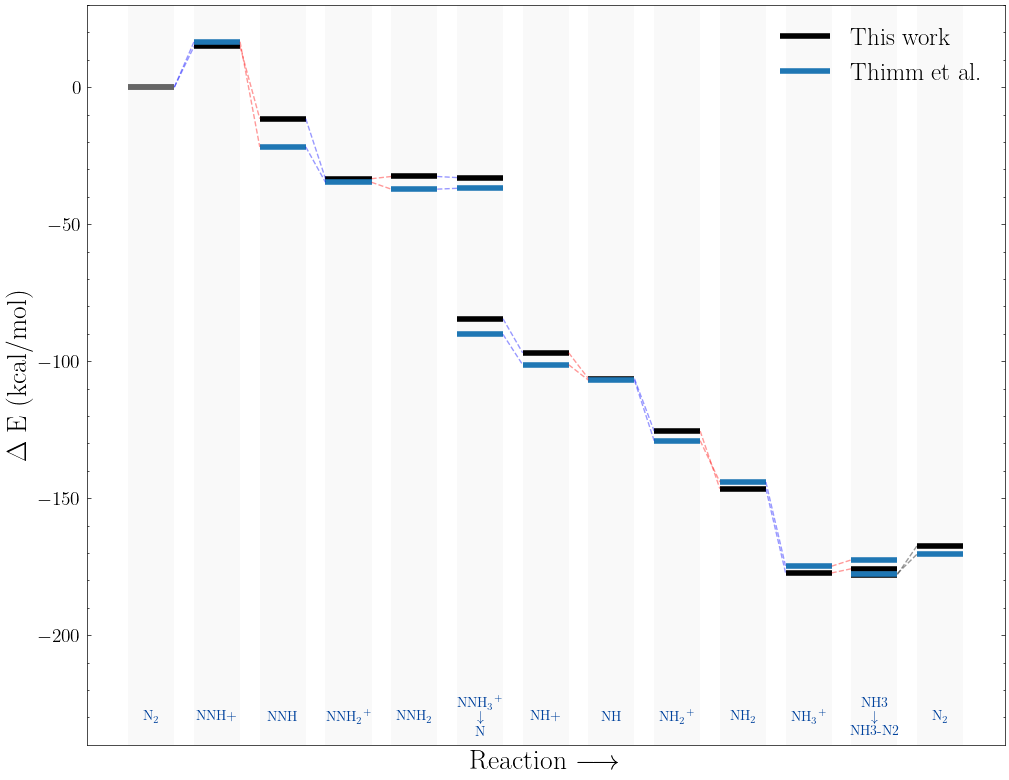

In [4]:
dict_key = "parts_radius_b3lyp_nogeo"
#dict_key2 = "parts_radius_pbe_nogeo_def2"
options = {
    "title": f"",
    "ylim": [-240, 30],
    "ylabel": r"$\Delta$ E (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/deltaE.pdf",
    "legend": ["This work", "Thimm et al."],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": False,
    "figsize": (12, 8),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
        ],
    ],
}
options = defaultdict(lambda: False, options)

compare_data = get_diagram_dicts(options)

compare_data["pbe_paper"] = collection["paper_b3lyp_diagram"]

plot_diagrams(compare_data, options)

### Plot B3LYP comparison with xtb correction

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.407765406183898
NH3->N2_NH3 : -2.109329391270876
NH3+->NH3 : 1.5165617705788463


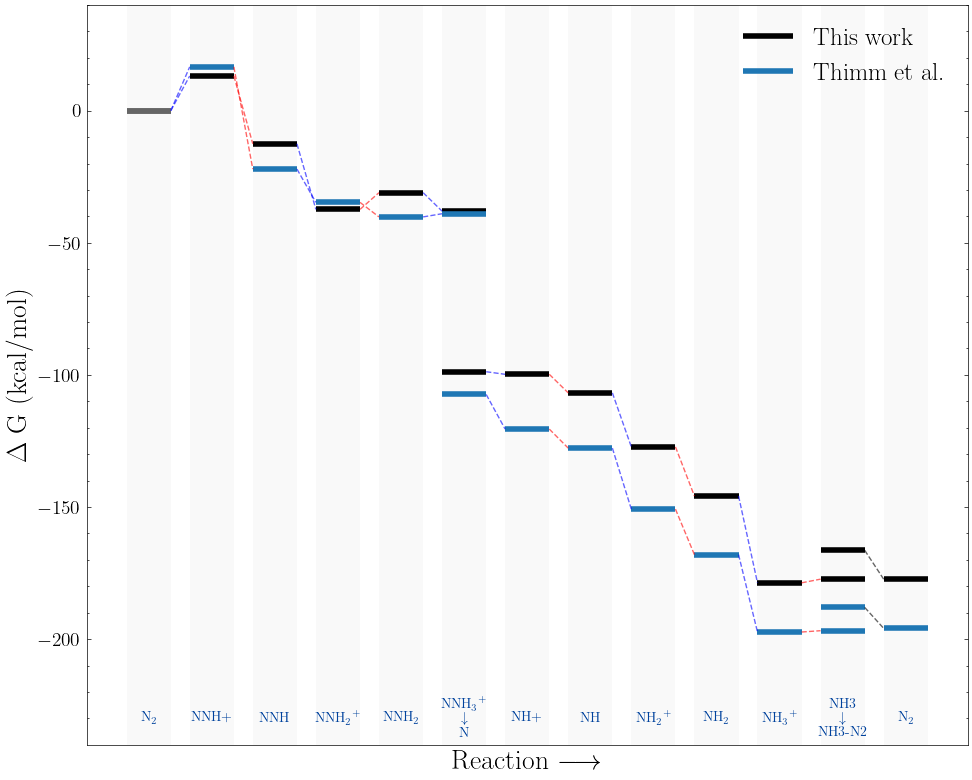

In [14]:
dict_key = "parts_radius_b3lyp_nogeo"
#dict_key2 = "parts_radius_pbe_nogeo_def2"
options = {
    "title": f"",
    "ylim": [-240, 40],
    "ylabel": r"$\Delta$ G (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/deltaG_xtbvib.pdf",
    "legend": ["This work", "Thimm et al."],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": True,
    "figsize": (12, 8),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
    ],
}
options = defaultdict(lambda: False, options)

compare_data = get_diagram_dicts(options)

compare_data["pbe_paper"] = collection["paper_b3lyp_diagram_G"]

plot_diagrams(compare_data, options)

# CandidatesCandidate

### Candidate 1

###  Thermal

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.407765406183898
NH3->N2_NH3 : -2.109329391270876
NH3+->NH3 : 1.5165617705788463
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/b3lyp_candidate1_C=C(C)CC(C)(C)N
NH3->N2 : -9.353154248092324
NH3->N2_NH3 : 3.4539507678709924
NH3+->NH3 : 9.887620752910152


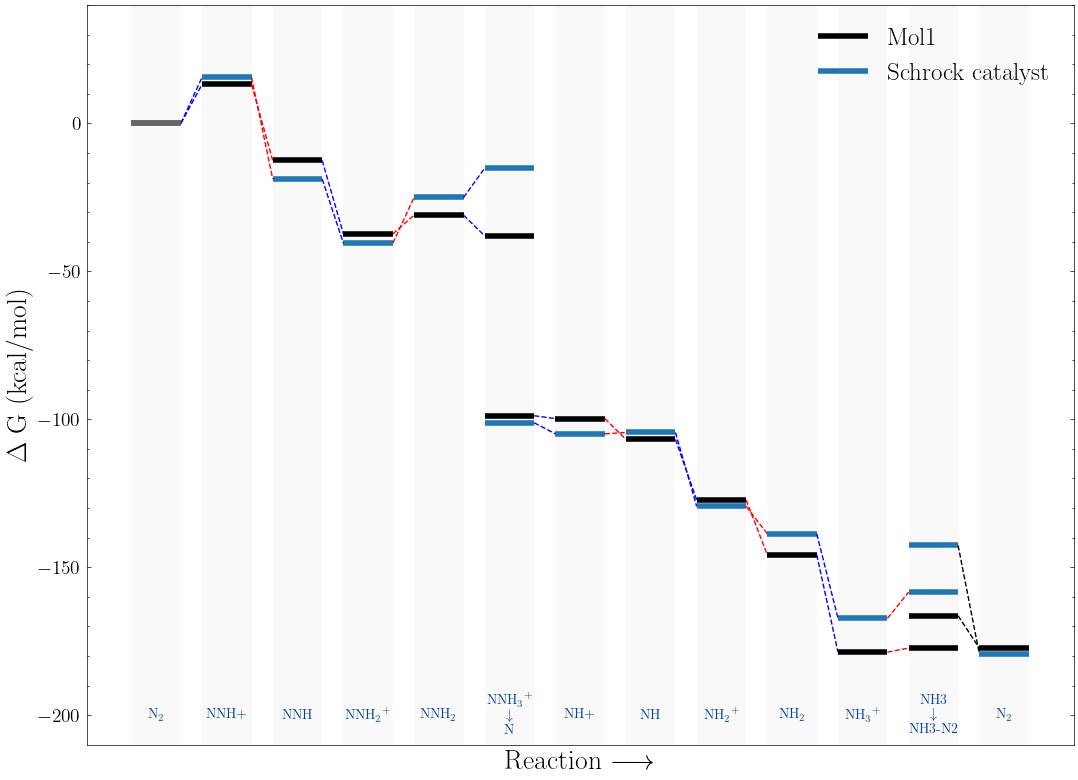

In [13]:
dict_key = "parts_radius_b3lyp_nogeo"
options = {
    "title": f"",
    "ylim": [-210, 40],
    "ylabel": r"$\Delta$ G (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/candidates/candidate1_thermal.pdf",
    "legend": ["Mol1", "Schrock catalyst"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": True,
    "figsize": (12, 8),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base
            / "schrock/diagrams_schrock/dft/b3lyp_candidates/b3lyp_candidate1_C=C(C)CC(C)(C)N",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/xtb_vibrations/candidate1")
        ],
    ],
}
options = defaultdict(lambda: False, options)

compare_data = get_diagram_dicts(options)

plot_diagrams(compare_data, options)

### Electronic

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.407765406183898
NH3->N2_NH3 : -2.109329391270876
NH3+->NH3 : 1.5165617705788463
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/b3lyp_candidate1_C=C(C)CC(C)(C)N
NH3->N2 : -9.353154248092324
NH3->N2_NH3 : 3.4539507678709924
NH3+->NH3 : 9.887620752910152


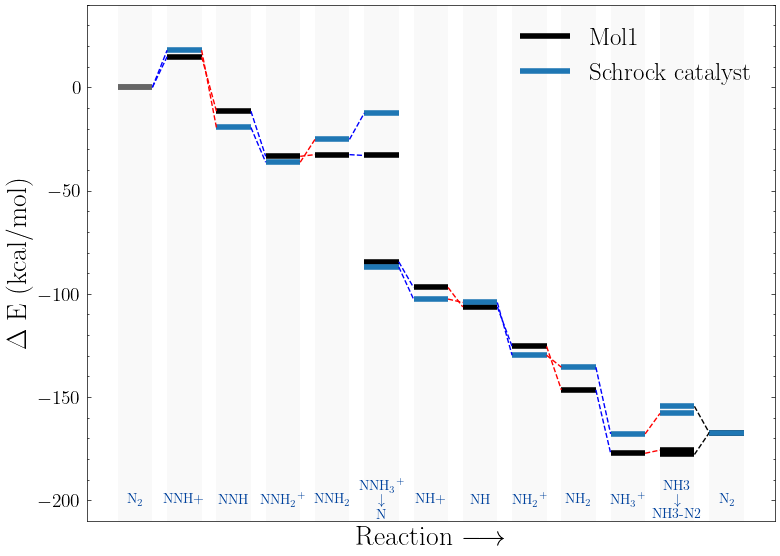

In [15]:
options['save_path'] = "/home/magstr/Documents/Paper/figures/candidates/candidate1.pdf"
options['thermal_correction'] = False
options['ylabel'] = r"$\Delta$ E (kcal/mol)"
options['figsize'] = (8, 8)

compare_data = get_diagram_dicts(options)
plot_diagrams(compare_data, options)

## Candidate 2

### Thermal

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.407765406183898
NH3->N2_NH3 : -2.109329391270876
NH3+->NH3 : 1.5165617705788463
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/b3lyp_sp_candidate2_binding
NH3->N2 : -2.0475255213677883
NH3->N2_NH3 : 4.683440204709768
NH3+->NH3 : 11.312921964330599


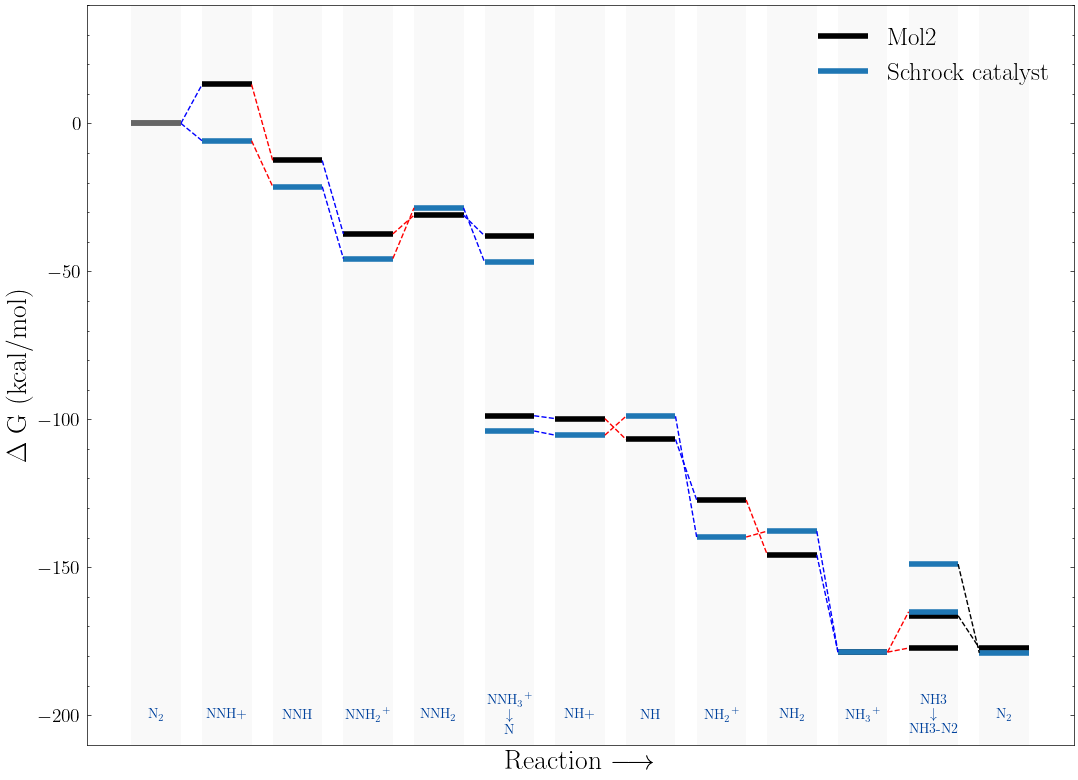

In [17]:
dict_key = "parts_radius_b3lyp_nogeo"
options = {
    "title": f"",
    "ylim": [-210, 40],
    "ylabel": r"$\Delta$ G (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/candidates/candidate2_thermal.pdf",
    "legend": ["Mol2", "Schrock catalyst"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": True,
    "figsize": (12, 8),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base
            / "schrock/diagrams_schrock/dft/b3lyp_candidates/b3lyp_sp_candidate2_binding",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/xtb_vibrations/candidate2")
        ],
    ],
}
options = defaultdict(lambda: False, options)

compare_data = get_diagram_dicts(options)

plot_diagrams(compare_data, options)

### Electronic

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.407765406183898
NH3->N2_NH3 : -2.109329391270876
NH3+->NH3 : 1.5165617705788463
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/b3lyp_sp_candidate2_binding
NH3->N2 : -2.0475255213677883
NH3->N2_NH3 : 4.683440204709768
NH3+->NH3 : 11.312921964330599


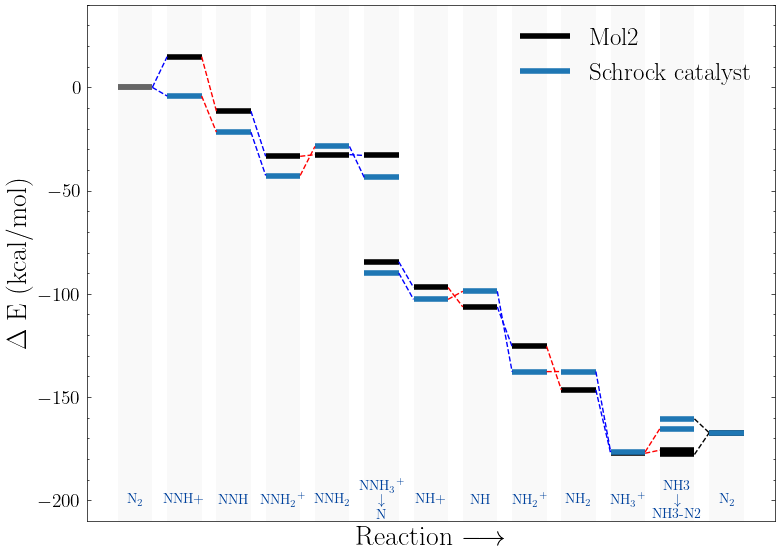

In [18]:
options['save_path'] = "/home/magstr/Documents/Paper/figures/candidates/candidate2.pdf"
options['thermal_correction'] = False
options['ylabel'] = r"$\Delta$ E (kcal/mol)"
options['figsize'] = (8, 8)

compare_data = get_diagram_dicts(options)
plot_diagrams(compare_data, options)

## Candidate 3

### Thermal

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.407765406183898
NH3->N2_NH3 : -2.109329391270876
NH3+->NH3 : 1.5165617705788463
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/b3lyp_sp_candidate3_reduction
NH3->N2 : -7.517474300693721
NH3->N2_NH3 : -17.689865734428167
NH3+->NH3 : -2.2581002118531615


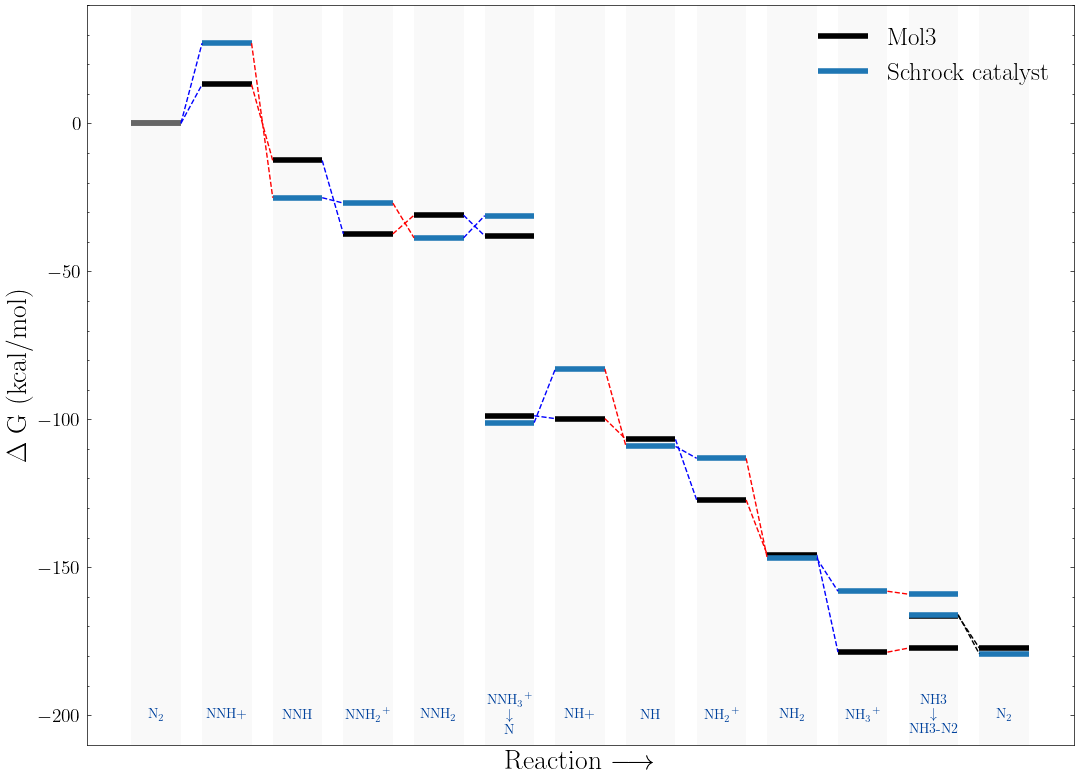

In [21]:
dict_key = "parts_radius_b3lyp_nogeo"
options = {
    "title": f"",
    "ylim": [-210, 40],
    "ylabel": r"$\Delta$ G (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/candidates/candidate3_thermal.pdf",
    "legend": ["Mol3", "Schrock catalyst"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": True,
    "figsize": (12, 8),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base
            / "schrock/diagrams_schrock/dft/b3lyp_candidates/b3lyp_sp_candidate3_reduction",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/xtb_vibrations/candidate3")
            
        ],
    ],
}
options = defaultdict(lambda: False, options)

compare_data = get_diagram_dicts(options)

plot_diagrams(compare_data, options)

### Electronic 

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.407765406183898
NH3->N2_NH3 : -2.109329391270876
NH3+->NH3 : 1.5165617705788463
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/b3lyp_sp_candidate3_reduction
NH3->N2 : -7.517474300693721
NH3->N2_NH3 : -17.689865734428167
NH3+->NH3 : -2.2581002118531615


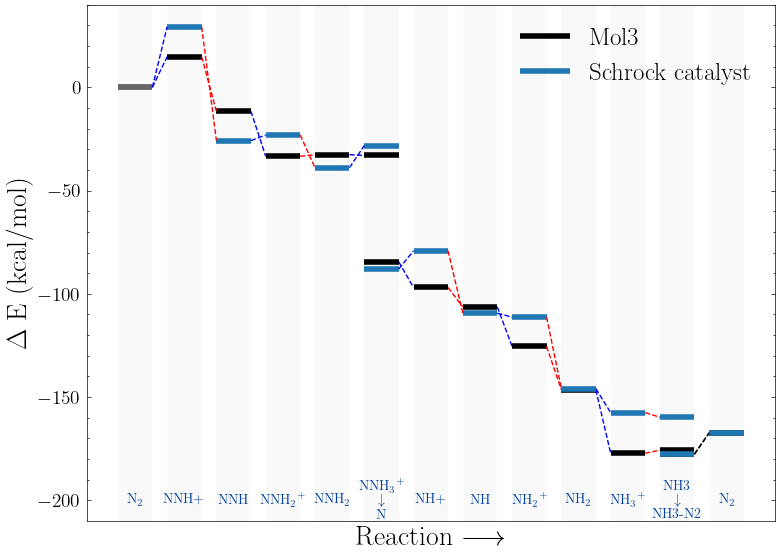

In [22]:
options['save_path'] = "/home/magstr/Documents/Paper/figures/candidates/candidate3.pdf"
options['thermal_correction'] = False
options['ylabel'] = r"$\Delta$ E (kcal/mol)"
options['figsize'] = (8, 8)

compare_data = get_diagram_dicts(options)
plot_diagrams(compare_data, options)

### Candidate 4

### Thermal

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.407765406183898
NH3->N2_NH3 : -2.109329391270876
NH3+->NH3 : 1.5165617705788463
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/b3lyp_sp_candidate4_binding
NH3->N2 : -8.358148115221411
NH3->N2_NH3 : -5.7566161644645035
NH3+->NH3 : 16.024176377570257


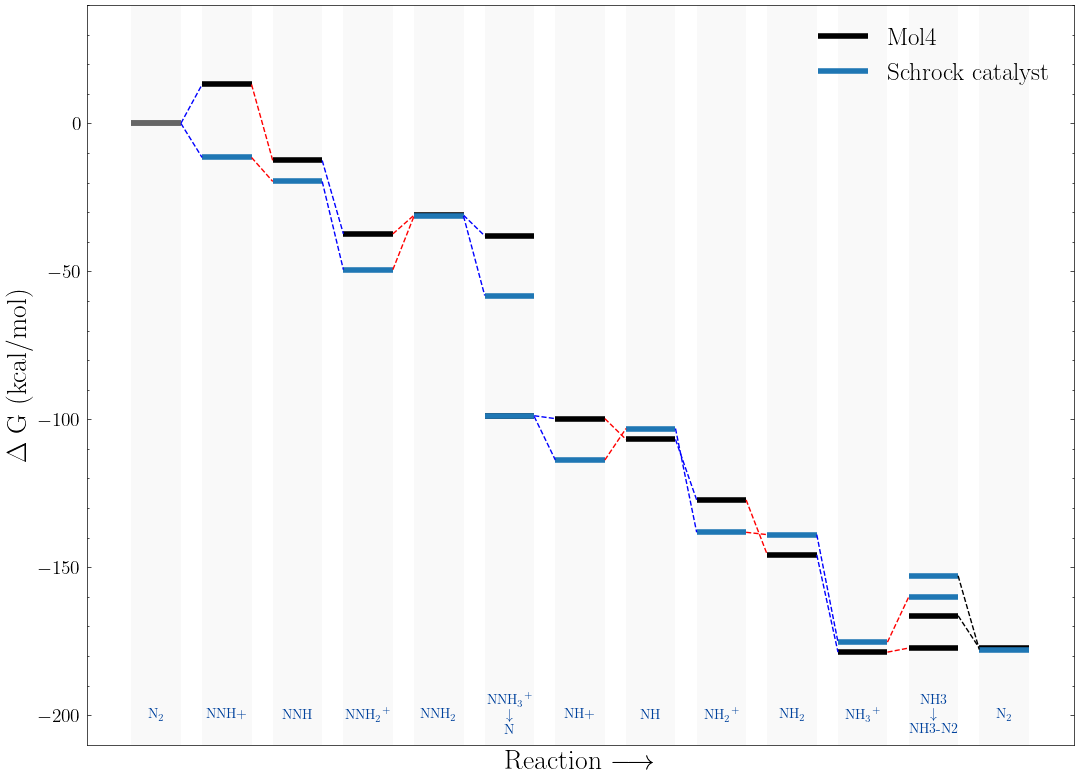

In [27]:
dict_key = "parts_radius_b3lyp_nogeo"
options = {
    "title": f"",
    "ylim": [-210, 40],
    "ylabel": r"$\Delta$ G (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/candidates/candidate4.pdf",
    "legend": ["Mol4", "Schrock catalyst"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": True,
    "figsize": (12, 8),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base
            / "schrock/diagrams_schrock/dft/b3lyp_candidates/b3lyp_sp_candidate4_binding",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/xtb_vibrations/candidate4")
            
        ],
    ],
}
options = defaultdict(lambda: False, options)

compare_data = get_diagram_dicts(options)

plot_diagrams(compare_data, options)

### Electronic

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.407765406183898
NH3->N2_NH3 : -2.109329391270876
NH3+->NH3 : 1.5165617705788463
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/b3lyp_sp_candidate4_binding
NH3->N2 : -8.358148115221411
NH3->N2_NH3 : -5.7566161644645035
NH3+->NH3 : 16.024176377570257


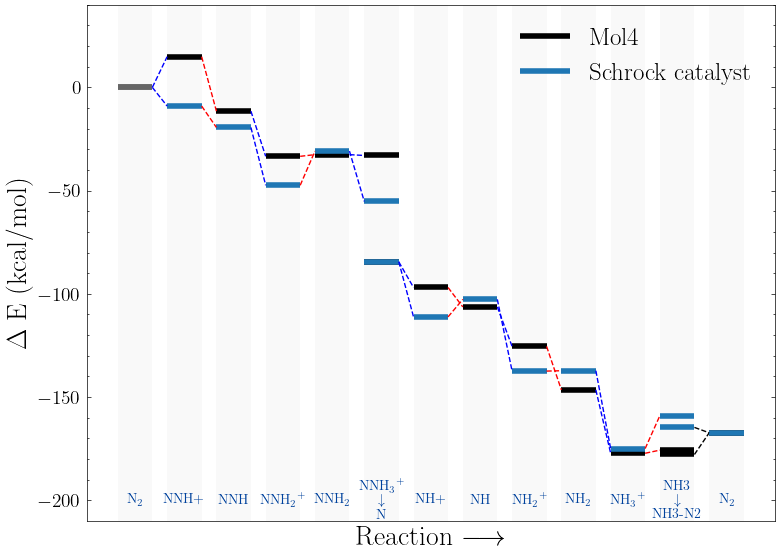

In [28]:
options['save_path'] = "/home/magstr/Documents/Paper/figures/candidates/candidate4.pdf"
options['thermal_correction'] = False
options['ylabel'] = r"$\Delta$ E (kcal/mol)"
options['figsize'] = (8, 8)

compare_data = get_diagram_dicts(options)
plot_diagrams(compare_data, options)

## Radius profiles

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/cycle_orca_fullyconverged_sarcJ
NH3->N2 : -11.269417158327997
NH3->N2_NH3 : -13.799883699975908
NH3+->NH3 : 17.72153281304054
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/cycle_orca_fullyconverged_radius_pbe
NH3->N2 : -10.785583401098847
NH3->N2_NH3 : -5.360379370860755
NH3+->NH3 : 17.53135614725761


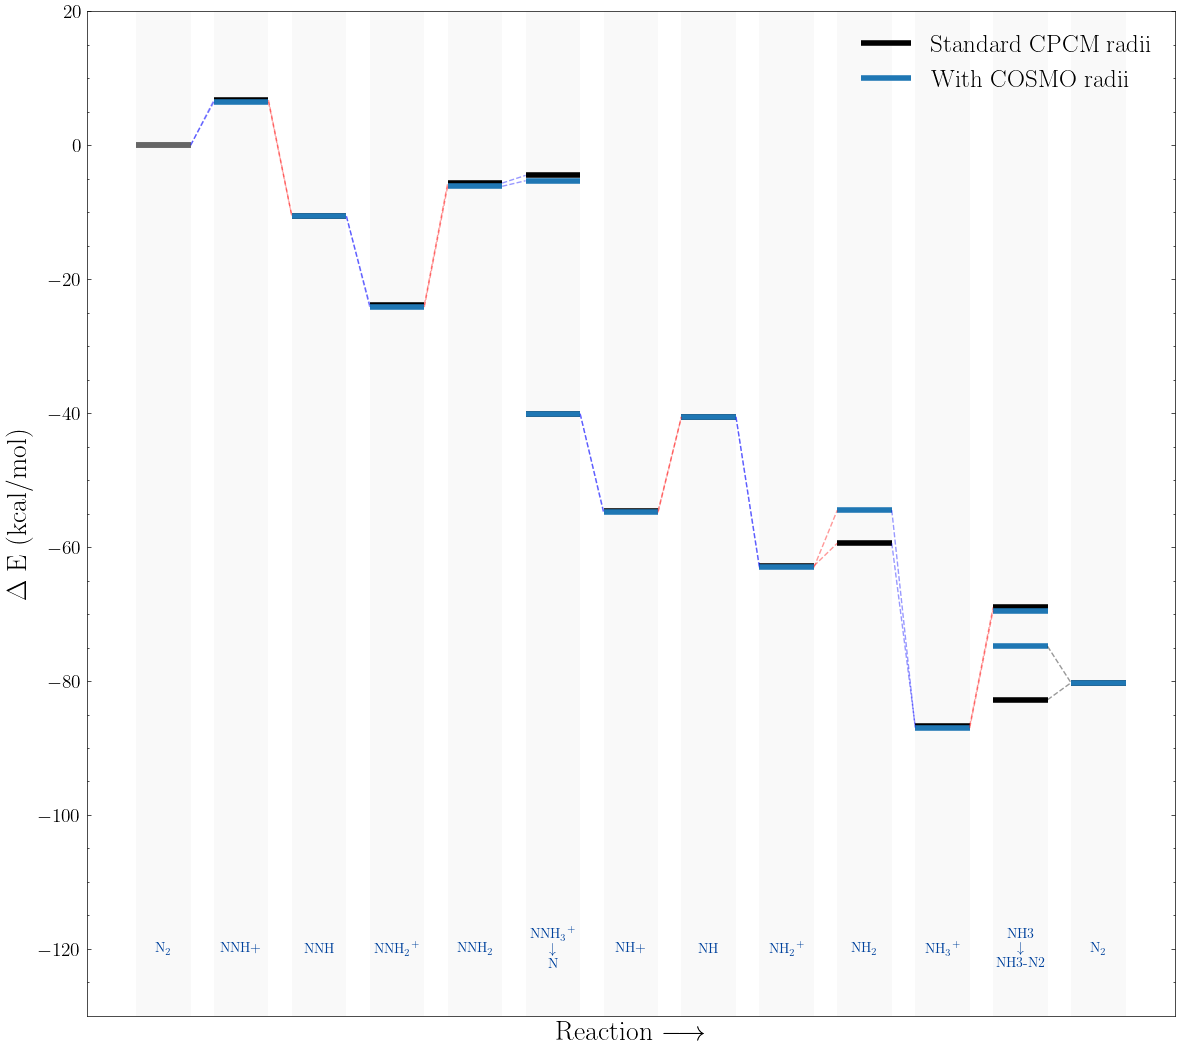

In [36]:
dict_key = "parts_radius_pbe_noegeo"
dict_key2 = "parts_radius_pbe_noegeo"
options = {
    "title": f"",
    "ylim": [-130, 20],
    "ylabel": r"$\Delta$ E (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/tmp.png",
    "legend": ["Standard CPCM radii", "With COSMO radii"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": False,
    "figsize": (12, 12),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/cycle_orca_fullyconverged_sarcJ",
            "orca_stepsize.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base / "schrock/diagrams_schrock/dft/cycle_orca_fullyconverged_radius_pbe",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key2],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
    ],
}
options = defaultdict(lambda: False, options)

compare_data = get_diagram_dicts(options)

plot_diagrams(compare_data, options)

### Compared to the reference data

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/cycle_orca_fullyconverged_sarcJ
NH3->N2 : 6.041866500861943
NH3->N2_NH3 : 29.507883050478995
NH3+->NH3 : 10.985970916924998
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/cycle_orca_fullyconverged_radius_pbe
NH3->N2 : 6.525700258091092
NH3->N2_NH3 : 37.94738737959415
NH3+->NH3 : 10.79579425114207


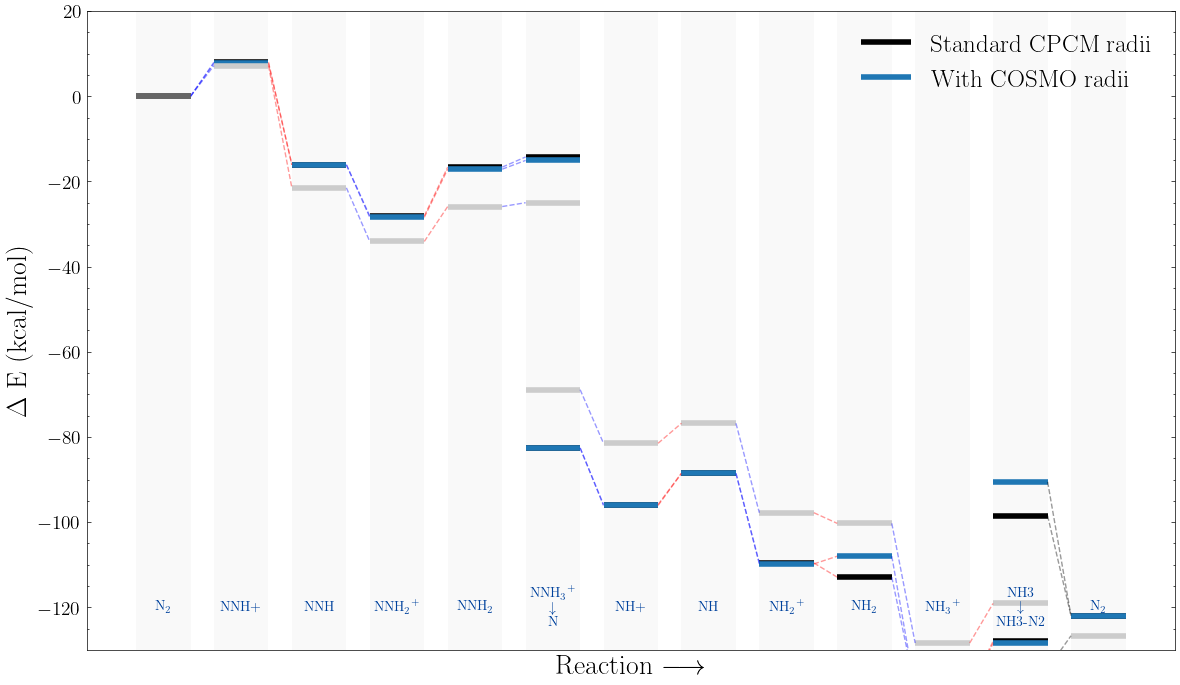

In [34]:
dict_key = "parts_b3lyp_sp_split"
dict_key2 = "parts_b3lyp_sp_split"
options = {
    "title": f"",
    "ylim": [-130, 20],
    "ylabel": r"$\Delta$ E (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/tmp2.png",
    "legend": ["Standard CPCM radii", "With COSMO radii"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": False,
    "figsize": (12, 12),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/cycle_orca_fullyconverged_sarcJ",
            "orca_stepsize.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base / "schrock/diagrams_schrock/dft/cycle_orca_fullyconverged_radius_pbe",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key2],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
    ],
}
options = defaultdict(lambda: False, options)

compare_data = get_diagram_dicts(options)
compare_data["pbe_paper"] = collection["paper_pbe_diagram"]

plot_diagrams(compare_data, options)